# embedding topology analysis

Use the observed loop/parallel trajectories in ENS of gut_dev_Huycke dataset.  

In [1]:
%load_ext autoreload
%autoreload 2

# Basic setup

In [2]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import time
from pathlib import Path
import torch
import concord as ccd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib as mpl
from scipy import sparse

from matplotlib import font_manager, rcParams
custom_rc = {
    'font.family': 'DejaVu Sans',
}

mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
proj_name = "gut_dev_Huycke"
file_name = "gut_dev_Huycke_Jul17-1902"
file_suffix = time.strftime('%b%d-%H%M')

save_dir = Path(f"../save/{proj_name}-{file_suffix}")
save_dir.mkdir(parents=True, exist_ok=True)
# save_dir = Path(f"../save/{proj_name}-Aug04-0015")

data_dir = Path(f"../data/{proj_name}")
data_dir.mkdir(parents=True, exist_ok=True)

seed = 0
ccd.ul.set_seed(seed)

In [4]:
# load the data
adata = sc.read_h5ad(data_dir / f"{file_name}_final.h5ad")

In [5]:
# Define color palette for broad_cell_type
_, _, broad_celltype_pal = ccd.pl.get_color_mapping(adata, 'broad_cell_type', pal='Set1', seed=seed)
_, _, phase_pal = ccd.pl.get_color_mapping(adata, 'phase', pal='Set1', seed=seed)

pal = {"broad_cell_type": broad_celltype_pal,
    'phase': phase_pal,}

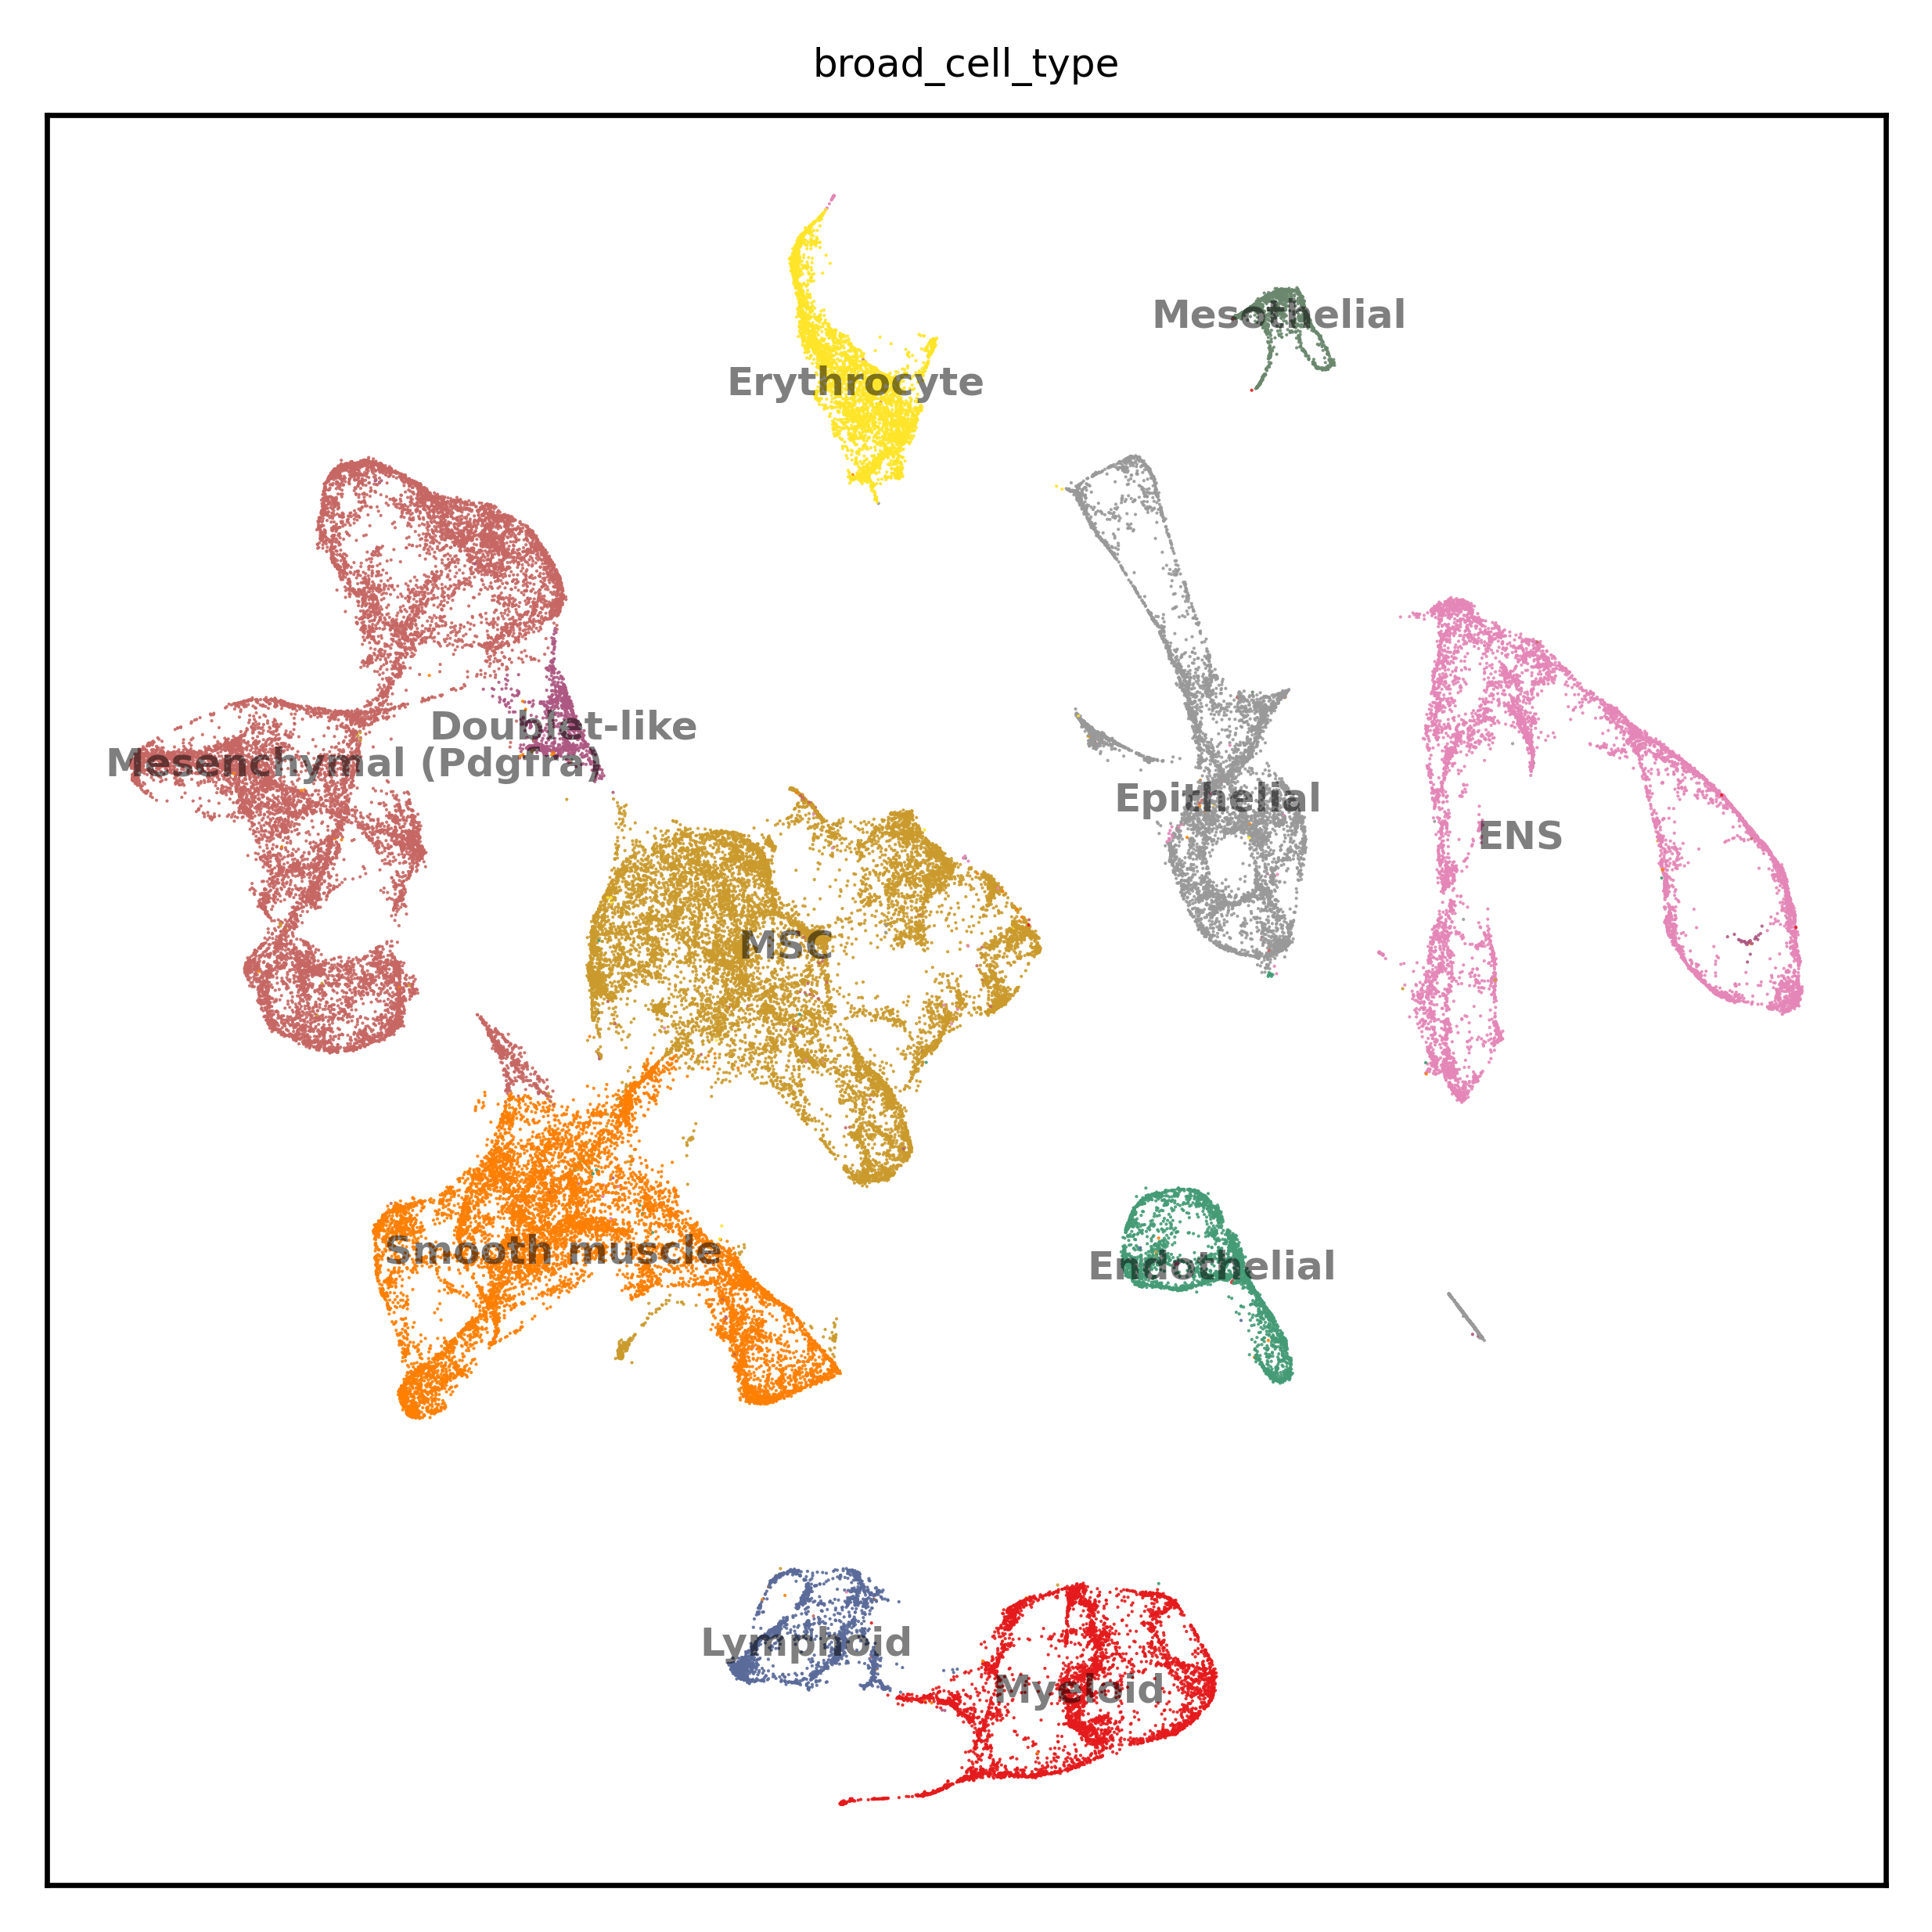

In [6]:
# basis = 'concord_hcl'
basis = 'concord_knn'
show_basis = basis + '_UMAP'
show_cols = ['broad_cell_type']
ccd.pl.plot_embedding(
    adata, show_basis, show_cols, figsize=(4,4), dpi=600, ncols=1, font_size=6, point_size=1, legend_loc="on data",
    pal=pal,
    save_path=save_dir / f"{file_name}_{show_basis}_embedding.svg"
)

----

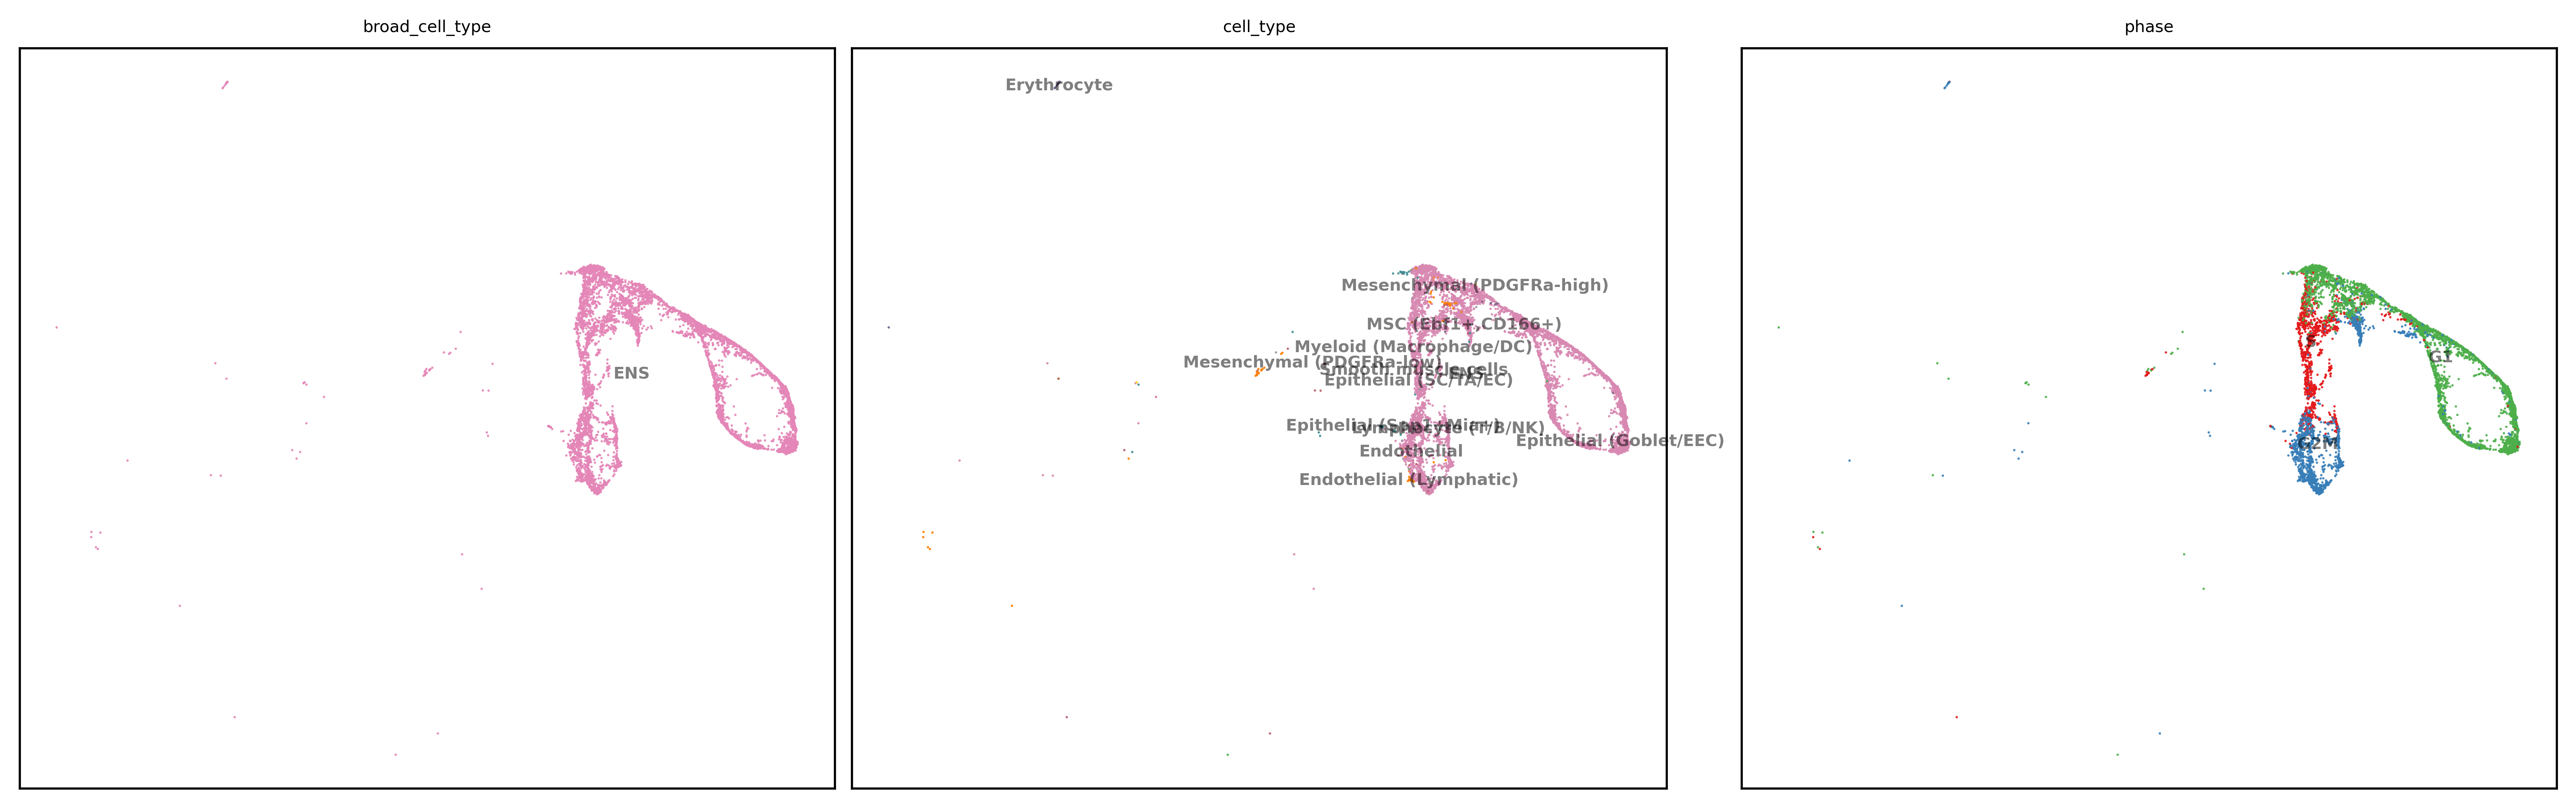

In [7]:
# plot UMAP of the cell subset in the concord_knn embedding
cell_type_subset = 'ENS'
adata_subset = adata[adata.obs['broad_cell_type'] == cell_type_subset].copy()
basis = 'concord_knn'
show_basis = basis + '_UMAP'
show_cols = ['broad_cell_type', 'cell_type', 'phase']       
ccd.pl.plot_embedding(
    adata_subset, show_basis, show_cols, figsize=(13,4), dpi=600, ncols=3, font_size=6, point_size=3, legend_loc="on data",
    pal=pal,
    save_path=save_dir / f"{file_name}_{show_basis}_{cell_type_subset}_embedding.pdf"
)

In [8]:
color_by = 'phase'

ccd.pl.plot_embedding_3d(
    adata_subset, basis='concord_knn_UMAP_3D', color_by=color_by,
    pal=pal,
    save_path=save_dir / f"{file_name}_{show_basis}_{cell_type_subset}_{color_by}_embedding_3d.html",
    point_size=1, opacity=0.7,
)

concord.plotting.pl_embedding - INFO - 3D plot saved to ../save/gut_dev_Huycke-Aug08-0552/gut_dev_Huycke_Jul17-1902_concord_knn_UMAP_ENS_phase_embedding_3d_phase.html


[Figure({
     'data': [{'hovertemplate': 'phase=G2M<br>DIM1=%{x}<br>DIM2=%{y}<br>DIM3=%{z}<extra></extra>',
               'legendgroup': 'G2M',
               'marker': {'color': '#377eb8', 'opacity': 0.7, 'size': 1, 'symbol': 'circle'},
               'mode': 'markers',
               'name': 'G2M',
               'scene': 'scene',
               'showlegend': True,
               'type': 'scatter3d',
               'x': {'bdata': ('zPY7P95NBb2m9Yg9k65OPY6JCD+uBR' ... '+dLBq/oUpgQZ1cYEEJO2FBFbYzPw=='),
                     'dtype': 'f4'},
               'y': {'bdata': ('vr4YQXWL+0CZXv9A2DsGQeiAGUG/ay' ... 'EDuiZBqHFBQcthQUGiFUFBpbcSQQ=='),
                     'dtype': 'f4'},
               'z': {'bdata': ('bj7eP5O8Br1jpBG/eHZLv6CY9T9f0O' ... '+njppA1MajwDyWo8CWkKLAR5rZPw=='),
                     'dtype': 'f4'}},
              {'hovertemplate': 'phase=S<br>DIM1=%{x}<br>DIM2=%{y}<br>DIM3=%{z}<extra></extra>',
               'legendgroup': 'S',
               'marker': {'color': '#e4

In [9]:
adata_subset.obsm['concord_knn_UMAP_3D_DIM2&3'] = adata_subset.obsm['concord_knn_UMAP_3D'][:, [1, 2]]

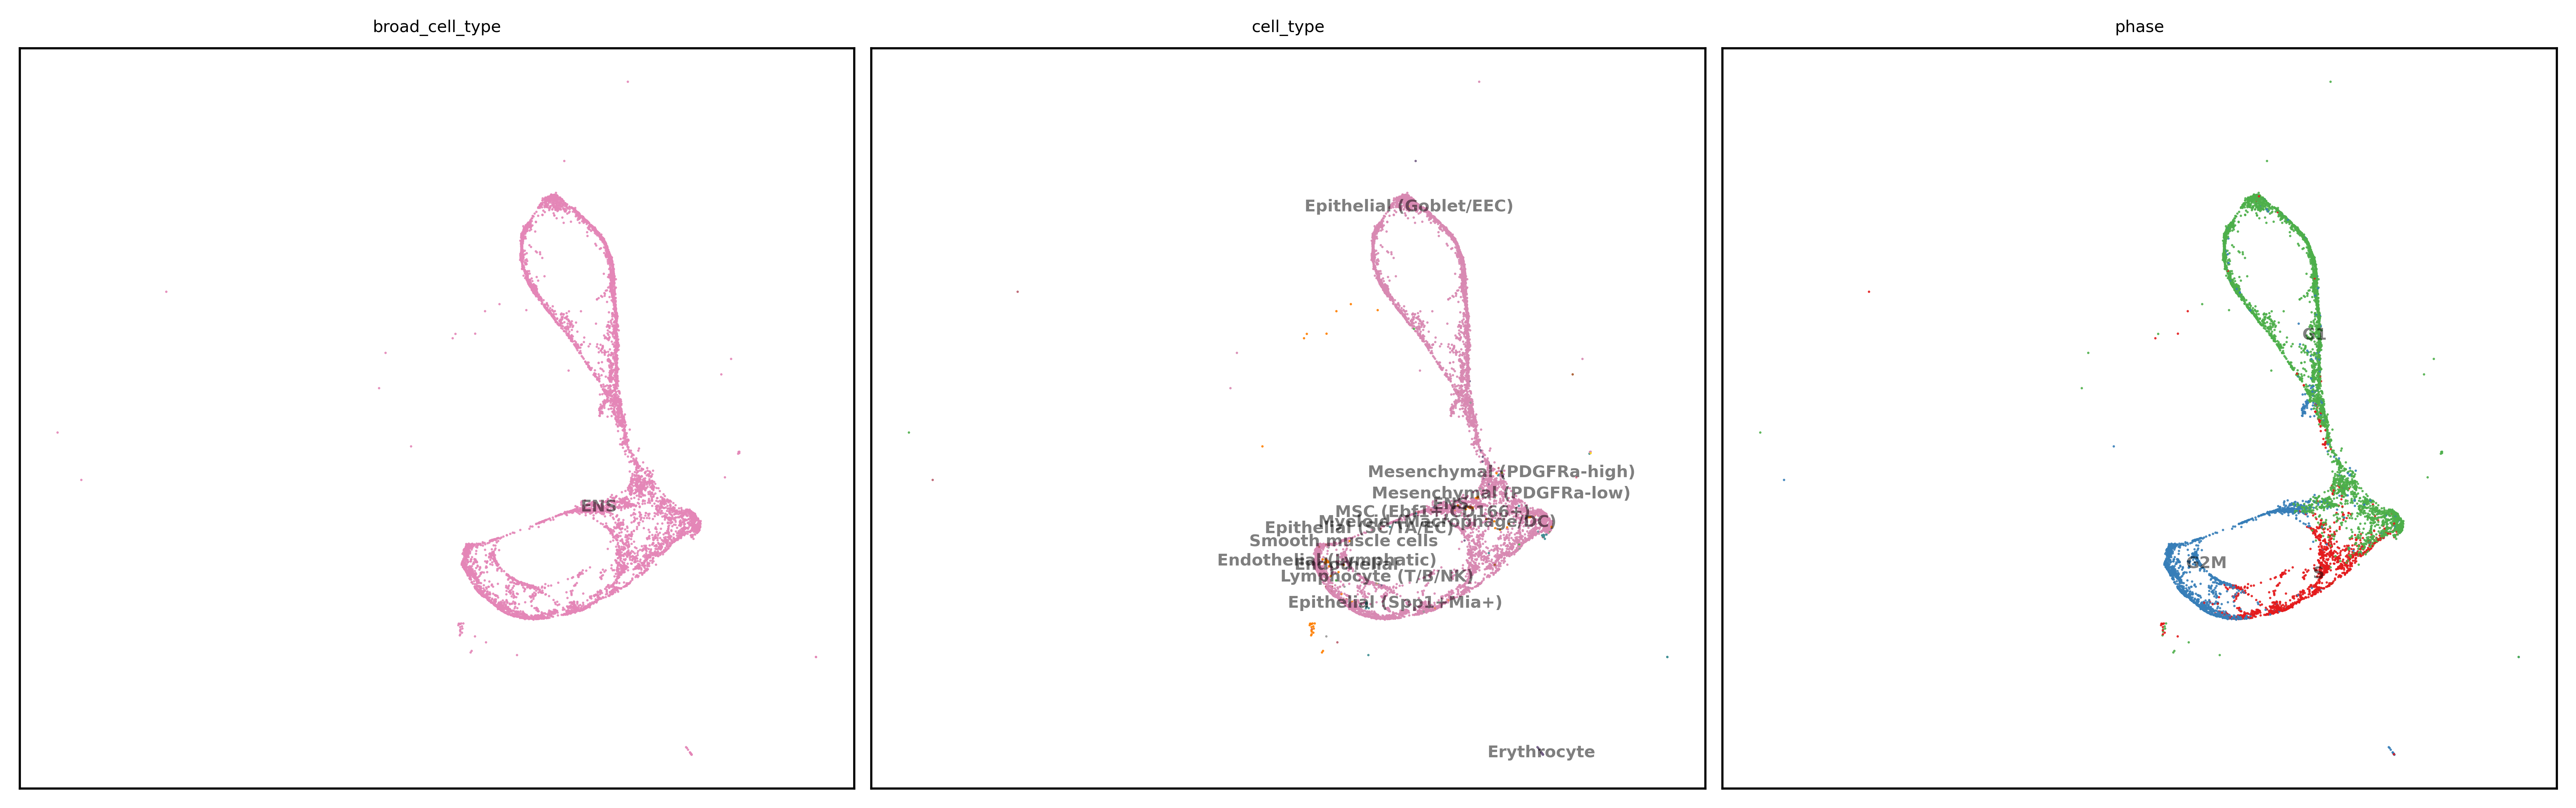

In [10]:
show_basis = 'concord_knn_UMAP_3D_DIM2&3'
show_cols = ['broad_cell_type', 'cell_type', 'phase'] 

ccd.pl.plot_embedding(
    adata_subset, show_basis, show_cols, figsize=(13,4), dpi=600, ncols=3, font_size=6, point_size=3, legend_loc="on data",
    pal=pal,
    save_path=save_dir / f"{file_name}_{show_basis}_{cell_type_subset}_embedding.pdf"
)

In [ ]:
adata_subset

----

In [ ]:
# load the adata_subset from previous analysis: loop in epithelial cells and loop in endothelial cells
adata_endo_loop = sc.read_h5ad("../save/gut_dev_Huycke-Aug06-2301/gut_dev_Huycke_Jul17-1902_endothelial_loop.h5ad")
adata_epi_loop = sc.read_h5ad("../save/gut_dev_Huycke-Aug06-2301/gut_dev_Huycke_Jul17-1902_epithelial_loop.h5ad")

In [ ]:
print(adata)
print(adata_endo_loop)
print(adata_epi_loop)

In [ ]:
# Create a Series mapping cell names to their loop category
import pandas as pd

# Initialize all cells as 'Others'
loop_status = pd.Series("Others", index=adata.obs_names)

# Set status for cells in endo_loop
loop_status.loc[adata_endo_loop.obs_names] = "endo_loop"

# Set status for cells in epi_loop
loop_status.loc[adata_epi_loop.obs_names] = "epi_loop"

# Assign it to adata.obs
adata.obs["loop_defined"] = loop_status

In [ ]:
adata.obs['loop_defined'].value_counts()

In [ ]:
show_cols = ['loop_defined']

_, _, loop_defined_pal = ccd.pl.get_color_mapping(adata, 'loop_defined', pal='Set1', seed=seed)
loop_defined_pal["Others"] = 'lightgray'

pal = {"broad_cell_type": broad_celltype_pal,
    'phase': phase_pal,
    'loop_defined': loop_defined_pal}

ccd.pl.plot_embedding(
    adata, show_basis, show_cols, figsize=(4,4), dpi=600, ncols=1, font_size=6, point_size=1, legend_loc="on data",
    pal=pal,
    save_path=save_dir / f"{file_name}_{show_basis}_{show_cols[0]}_embedding.svg"
)

In [ ]:
adata

----

# loop analysis: epithelial cells (1) leiden clustering

In [ ]:
import scanpy as sc

# Step 1: Create a neighbor graph from the latent space you want to use
sc.pp.neighbors(adata_epi_loop, use_rep='concord_knn', n_neighbors=15)

# Step 2: Run Leiden clustering
sc.tl.leiden(adata_epi_loop, resolution=0.5, key_added='leiden_concord_knn')

In [ ]:
# Step 1: Define custom mapping
# Replace keys with original Leiden cluster labels and values with desired labels based on loop_order
leiden_loop_map = {
    '3': 'loop1',
    '7': 'loop1',
    '8': 'loop1',
    '2': 'loop1',
    '0': 'loop1',     
    '1': 'loop2',
    '6': 'loop2',
    '9': 'loop2',
    '5': 'loop2',
    '4': 'loop2',
}

leiden_loop_clusters_map = {
    '3': 'loop1-1',
    '7': 'loop1-2',
    '8': 'loop1-3',
    '2': 'loop1-4',
    '0': 'loop1-5',
    '1': 'loop2-1',
    '6': 'loop2-2',
    '9': 'loop2-3',
    '5': 'loop2-4',
    '4': 'loop2-5',
    # ... continue as needed
}

# Step 2: Apply the mapping
adata_epi_loop.obs['leiden_loop'] = (
    adata_epi_loop.obs['leiden_concord_knn'].map(leiden_loop_map)
)

adata_epi_loop.obs['leiden_loop_clusters'] = (
    adata_epi_loop.obs['leiden_concord_knn'].map(leiden_loop_clusters_map)
)

# Step 3: Set as categorical with order (optional, for plotting consistency)
custom_order = pd.unique(adata_epi_loop.obs['leiden_loop_clusters']).tolist()
custom_order.sort()

adata_epi_loop.obs['leiden_loop_clusters'] = pd.Categorical(
    adata_epi_loop.obs['leiden_loop_clusters'],
    categories=custom_order,
    ordered=True
)

_, _, leiden_loop_pal = ccd.pl.get_color_mapping(adata_epi_loop, 'leiden_loop', pal='Set1', seed=seed)
_, _, leiden_loop_clusters_pal = ccd.pl.get_color_mapping(adata_epi_loop, 'leiden_loop_clusters', pal='Set1', seed=seed)
pal = {
    "broad_cell_type": broad_celltype_pal,
    'phase': phase_pal,
    'leiden_loop': leiden_loop_pal,
    'leiden_loop_clusters': leiden_loop_clusters_pal}

----

# loop analysis: epithelial cells (2) order cells by pseudotime

In [ ]:
import numpy as np
import pandas as pd

# Step 1: Get UMAP coordinates and loop labels
X_loop = adata_epi_loop.obsm['concord_knn_UMAP']
loop_labels = adata_epi_loop.obs['leiden_loop']

# Step 2: Choose center
center = X_loop.mean(axis=0)  # or np.array([x, y])
X_centered = X_loop - center

# Step 3: Compute base angles in radians
angles = np.arctan2(X_centered[:, 1], X_centered[:, 0])  # [-π, π]
angles = (angles + 2 * np.pi) % (2 * np.pi)  # Convert to [0, 2π]

# Step 4: Apply custom angle shift per loop
angle_shifted = angles.copy()
angle_shifted[loop_labels == 'loopA'] = (angles[loop_labels == 'loopA'] - 5 * np.pi / 12) % (2 * np.pi)
angle_shifted[loop_labels == 'loopB'] = (angles[loop_labels == 'loopB'] - 7 * np.pi / 12) % (2 * np.pi)

# Step 5: Store in .obs
adata_epi_loop.obs['loop_angle'] = angle_shifted

# Step 6: Order cells by angle (loop-wise)
adata_epi_loop.obs['loop_order'] = (
    angle_shifted.argsort().argsort()  # Gives 0 to N-1 ranking
)


----

# loop analysis: epithelial cells (3) run DEG between clusters for each loop

In [ ]:
loop_results = {}

for loop_label in adata_epi_loop.obs['leiden_loop'].unique():
    print(f"Running rank_genes_groups for {loop_label}")

    adata_loop = adata_epi_loop[adata_epi_loop.obs['leiden_loop'] == loop_label].copy()

    sc.tl.rank_genes_groups(
        adata_loop,
        groupby='leiden_loop_clusters',
        method='wilcoxon',
        use_raw=False,
    )
    
    # Store in dict
    loop_results[loop_label] = adata_loop

# # Save each loop's results
# for loop_label, adata_loop in loop_results.items():
#     output_file = save_dir / f"{file_name}_epi_loop_{loop_label}_rank_genes.h5ad"
#     adata_loop.write_h5ad(output_file)
#     print(f"Saved {loop_label} results to {output_file}")


----

# loop analysis: endothelial

In [ ]:
import scanpy as sc

# Step 1: Create a neighbor graph from the latent space you want to use
sc.pp.neighbors(adata_endo_loop, use_rep='concord_knn', n_neighbors=15)

# Step 2: Run Leiden clustering
sc.tl.leiden(adata_endo_loop, resolution=0.2, key_added='leiden_concord_knn')

In [ ]:
# Step 1: Define custom mapping
# Replace keys with original Leiden cluster labels and values with desired labels based on loop_order
leiden_loop_map = {
    '0': 'loop1',
    '3': 'loop1',
    '2': 'loop1',
    '1': 'loop1',
    '4': 'loop1',
}

leiden_loop_clusters_map = {
    '0': 'loop1-1',
    '3': 'loop1-2',
    '2': 'loop1-3',
    '1': 'loop1-4',
    '4': 'loop1-5',
    # ... continue as needed
}

# Step 2: Apply the mapping
adata_endo_loop.obs['leiden_loop'] = (
    adata_endo_loop.obs['leiden_concord_knn'].map(leiden_loop_map)
)
adata_endo_loop.obs['leiden_loop_clusters'] = (
    adata_endo_loop.obs['leiden_concord_knn'].map(leiden_loop_clusters_map)
)

# Step 3: Set as categorical with order (optional, for plotting consistency)
custom_order = list(leiden_loop_clusters_map.values())  # ['loop-1', 'loop-2', ...] in your preferred order
adata_endo_loop.obs['leiden_loop_clusters'] = pd.Categorical(
    adata_endo_loop.obs['leiden_loop_clusters'],
    categories=custom_order,
    ordered=True
)

_, _, leiden_loop_pal = ccd.pl.get_color_mapping(adata_endo_loop, 'leiden_loop', pal='Set1', seed=seed)
_, _, leiden_loop_clusters_pal = ccd.pl.get_color_mapping(adata_endo_loop, 'leiden_loop_clusters', pal='Set1', seed=seed)
pal = {"broad_cell_type": broad_celltype_pal,
    'phase': phase_pal,
    'leiden_loop': leiden_loop_pal,
    'leiden_loop_clusters': leiden_loop_clusters_pal}

In [ ]:
# order cells by pseudotime

import numpy as np
import pandas as pd

# Step 1: Get UMAP coordinates and loop labels
X_loop = adata_endo_loop.obsm['concord_knn_UMAP']

# Step 2: Choose center
center = X_loop.mean(axis=0)  # or np.array([x, y])
X_centered = X_loop - center

# Step 3: Compute base angles in radians
angles = np.arctan2(X_centered[:, 1], X_centered[:, 0])  # [-π, π]
angles = (angles + 2 * np.pi) % (2 * np.pi)  # Convert to [0, 2π]

# Step 4: Apply custom angle shift per loop
angle_shifted = angles.copy()
angle_shifted = (angles + np.pi / 4) % (2 * np.pi)

# Step 5: Store in .obs
adata_endo_loop.obs['loop_angle'] = angle_shifted

# Step 6: Order cells by angle (loop-wise)
adata_endo_loop.obs['loop_order'] = (
    angle_shifted.argsort().argsort()  # Gives 0 to N-1 ranking
)

In [ ]:
import scanpy as sc

sc.tl.rank_genes_groups(
    adata_endo_loop, 
    groupby='leiden_loop_clusters', 
    method='wilcoxon', 
    use_raw=False
)

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract top N DEGs per leiden cluster
degs_df = sc.get.rank_genes_groups_df(adata_endo_loop, group=None)
top_n = 20
top_genes = (
    degs_df
    .groupby("group")
    .apply(lambda x: x.nsmallest(top_n, "pvals_adj"))
    .reset_index(drop=True)["names"]
    .unique()
    .tolist()
)
print(f"{len(top_genes)} top DEGs extracted across leiden_loop_clusters.")

# Step 2: Subset AnnData and compute z-score
adata_degs = adata_endo_loop[:, top_genes].copy()
X = adata_degs.X.toarray() if hasattr(adata_degs.X, "toarray") else adata_degs.X
adata_degs.layers["zscore"] = zscore(X, axis=0)

# Step 3: Order cells
# Base on leiden_loop_clusters
# adata_degs.obs["sort_key"] = adata_degs.obs["leiden_loop_clusters"].cat.codes

# Based on leiden_loop_clusters and loop_order
# adata_degs.obs["leiden_order"] = adata_degs.obs["leiden_loop_clusters"].cat.codes
# adata_degs.obs["sort_key"] = adata_degs.obs["leiden_order"] + adata_degs.obs["loop_order"] * 1e-4

# # Based on loop_order
adata_degs.obs["sort_key"] = adata_degs.obs["loop_order"]

adata_degs = adata_degs[adata_degs.obs.sort_values("sort_key").index].copy()

# Step 4: Use predefined peak-sorting function on zscore matrix
# Prepare adata_degs.obsm["zscore"] for function input
adata_degs.obsm["zscore"] = adata_degs.layers["zscore"]
loop_path = np.argsort(adata_degs.obs["loop_order"].values)

sorted_data, _, _, sorted_columns = ccd.ul.sort_and_smooth_signal_along_path(
    adata_degs,
    signal_key="zscore",
    path=loop_path,
    sigma=2
)

# Step 5: Reorder genes in AnnData object
adata_degs = adata_degs[:, sorted_columns].copy()

# Step 6: Plot
with plt.rc_context(rc=custom_rc):
    ccd.pl.heatmap_with_annotations(
        adata=adata_degs,
        val="zscore",
        transpose=True,
        obs_keys=['phase', 'loop_order'],
        pal=pal,
        use_clustermap=True,
        cluster_rows=False,
        cluster_cols=False,
        yticklabels='auto',
        cmap=sns.color_palette("viridis", as_cmap=True),
        row_scale=False,
        clip_limits=(-3, 3),
        rasterize=True,
        title="Top DEGs (genes ordered by peak loop expression)",
        figsize=(6, 5),
        title_fontsize=12,
        save_path=save_dir / f"{proj_name}_endothelial_top_degs_heatmap.svg",
        show=True
    )

In [ ]:
# save the adata_endo_loop
adata_endo_loop.write_h5ad(save_dir / f"{file_name}_endothelial_loop.h5ad")

In [ ]:
# save top_genes into a file
with open(save_dir / f"{proj_name}_endothelial_top_degs.txt", "w") as f:
    f.write("\n".join(top_genes))
print(f"Top DEGs saved to {save_dir / f'{proj_name}_endothelial_top_degs.txt'}")

----

# loop analysis: epithelial cells (4) plot cellxgene heatmap for each loop

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Combine DEGs from all loop subsets in loop_results
top_n = 20
combined_degs = []

for loop_label, adata_loop in loop_results.items():
    degs_df = sc.get.rank_genes_groups_df(adata_loop, group=None)
    degs_df["loop"] = loop_label  # Add loop label for traceability

    top_genes_df = (
        degs_df
        .groupby("group")
        .apply(lambda x: x.nsmallest(top_n, "pvals_adj"))
        .reset_index(drop=True)
    )

    # Step 3: Get unique top genes across all clusters and loops
    top_genes = top_genes_df["names"].unique().tolist()
    print(f"{len(top_genes)} unique top DEGs extracted across all clusters in all loops.")

    # Step 2: Subset AnnData and compute z-score
    adata_degs = adata_loop[:, top_genes].copy()
    X = adata_degs.X.toarray() if hasattr(adata_degs.X, "toarray") else adata_degs.X
    adata_degs.layers["zscore"] = zscore(X, axis=0)

    # Step 3: Order cells
    # # Base on leiden_loop_clusters
    # adata_degs.obs["sort_key"] = adata_degs.obs["leiden_loop_clusters"].cat.codes

    # # Based on leiden_loop_clusters and loop_order
    # # adata_degs.obs["leiden_order"] = adata_degs.obs["leiden_loop_clusters"].cat.codes
    # # adata_degs.obs["sort_key"] = adata_degs.obs["leiden_order"] + adata_degs.obs["loop_order"] * 1e-4

    # Based on loop_order
    adata_degs.obs["sort_key"] = adata_degs.obs["loop_order"]

    adata_degs = adata_degs[adata_degs.obs.sort_values("sort_key").index].copy()

    # Step 4: Use predefined peak-sorting function on zscore matrix
    # Prepare adata_degs.obsm["zscore"] for function input
    adata_degs.obsm["zscore"] = adata_degs.layers["zscore"]
    loop_path = np.argsort(adata_degs.obs["sort_key"].values)

    sorted_data, _, _, sorted_columns = ccd.ul.sort_and_smooth_signal_along_path(
        adata_degs,
        signal_key="zscore",
        path=loop_path,
        sigma=2
    )

    # Step 5: Reorder genes in AnnData object
    adata_degs = adata_degs[:, sorted_columns].copy()

    # Step 6: Plot
    with plt.rc_context(rc=custom_rc):
        ccd.pl.heatmap_with_annotations(
            adata=adata_degs,
            val="zscore",
            transpose=True,
            obs_keys=["phase", "loop_order","leiden_loop","leiden_loop_clusters", ],
            pal={
                "leiden_loop": leiden_loop_pal,
                "leiden_loop_clusters": leiden_loop_clusters_pal,
                "phase": phase_pal
            },
            use_clustermap=True,
            cluster_rows=False,
            cluster_cols=False,
            cmap=sns.color_palette("viridis", as_cmap=True),
            row_scale=False,
            clip_limits=(-3, 3),
            rasterize=True,
            title="Top DEGs across clusters (genes ordered by peak loop expression)",
            figsize=(12, 10),
            save_path=save_dir / f"{proj_name}_{loop_label}_top_degs_heatmap_2.svg",
            show=True
        )

    # save the genes into a file
    with open(save_dir / f"{proj_name}_{loop_label}_top_degs.txt", "w") as f:
        f.write("\n".join(top_genes))
    print(f"Top DEGs for {loop_label} saved to {save_dir / f'{proj_name}_{loop_label}_top_degs.txt'}")

In [ ]:
# Dictionary to store top DEGs per loop
top_genes_dict = {}

# Load top DEGs from saved files
for loop_label in loop_results.keys():
    top_degs_file = save_dir / f"{proj_name}_{loop_label}_top_degs.txt"
    if top_degs_file.exists():
        with open(top_degs_file, "r") as f:
            top_genes = f.read().splitlines()
            top_genes_dict[loop_label] = top_genes
        print(f"Loaded {len(top_genes)} top DEGs for {loop_label} from {top_degs_file}")
    else:
        print(f"No top DEGs file found for {loop_label} at {top_degs_file}")


In [ ]:
# Compute intersection of top DEGs between loopA and loopB
top_genes_across_loops = list(set(top_genes_dict['loop1']) & set(top_genes_dict['loop2']))
print(f"Found {len(top_genes_across_loops)} common top DEGs between loopA and loopB.")

# save the intersection of top DEGs
with open(save_dir / f"{proj_name}_epithelial_loops_top_degs_intersection.txt", "w") as f:
    f.write("\n".join(top_genes_across_loops))
print(f"Top DEGs across loops saved to {save_dir / f'{proj_name}_epithelial_loops_top_degs_intersection.txt'}")

# loop analysis: epithelial cells (5) plot cellxgene heatmap between loops

In [ ]:
import scanpy as sc

sc.tl.rank_genes_groups(
    adata_epi_loop, 
    groupby='leiden_loop', 
    method='wilcoxon', 
    use_raw=False
)

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract top N DEGs per leiden cluster
degs_df = sc.get.rank_genes_groups_df(adata_epi_loop, group=None)
top_n = 40
top_n_lfc = 5

def select_top_bottom_lfc(df):
    top_p = df.nsmallest(top_n, "pvals_adj")
    top_up = top_p.nlargest(top_n_lfc, "logfoldchanges")
    top_down = top_p.nsmallest(top_n_lfc, "logfoldchanges")
    return pd.concat([top_up, top_down])


top_genes_df = (
    degs_df
    .groupby("group")
    .apply(select_top_bottom_lfc)
    .reset_index(drop=True)
)

top_genes = top_genes_df["names"].unique().tolist()
print(f"{len(top_genes)} top DEGs extracted across leiden_loop clusters.")

# Step 2: Subset AnnData and compute z-score
adata_degs = adata_epi_loop[:, top_genes].copy()
X = adata_degs.X.toarray() if hasattr(adata_degs.X, "toarray") else adata_degs.X
adata_degs.layers["zscore"] = zscore(X, axis=0)

# Step 3: Order cells by leiden_loop
adata_degs.obs["leiden_order"] = adata_degs.obs["leiden_loop"].cat.codes
adata_degs = adata_degs[adata_degs.obs.sort_values("leiden_order").index].copy()

# Step 4: Use predefined peak-sorting function on zscore matrix
# Prepare adata_degs.obsm["zscore"] for function input
adata_degs.obsm["zscore"] = adata_degs.layers["zscore"]
loop_path = np.argsort(adata_degs.obs["leiden_order"].values)

sorted_data, _, _, sorted_columns = ccd.ul.sort_and_smooth_signal_along_path(
    adata_degs,
    signal_key="zscore",
    path=loop_path,
    sigma=2
)

# Step 5: Reorder genes in AnnData object
adata_degs = adata_degs[:, sorted_columns].copy()

# Step 6: Define palette for clusters
# unique_clusters = adata_degs.obs['leiden_loop'].cat.categories
# palette = sns.color_palette("tab20", len(unique_clusters))
# pal = {"leiden_loop": dict(zip(unique_clusters, palette))}

_, _, leiden_loop_pal = ccd.pl.get_color_mapping(adata_degs, 'leiden_loop', pal='Set1', seed=seed)

# Step 7: Plot
with plt.rc_context(rc=custom_rc):
    ccd.pl.heatmap_with_annotations(
        adata=adata_degs,
        val="zscore",
        transpose=True,
        obs_keys=["leiden_loop"],
        pal={"leiden_loop": leiden_loop_pal},
        use_clustermap=True,
        cluster_rows=False,
        cluster_cols=False,
        cmap=sns.color_palette("viridis", as_cmap=True),
        row_scale=False,
        clip_limits=(-3, 3),
        rasterize=True,
        title="Top DEGs across clusters (genes ordered by peak loop expression)",
        figsize=(12, 4),
        save_path=save_dir / f"{proj_name}_epithelial_between_loops_top_degs_heatmap.svg",
        show=True
    )


In [ ]:
top_genes_between_loops = top_genes

In [ ]:
# save the genes into a file
with open(save_dir / f"{proj_name}_epithelial_between_loops_top_degs.txt", "w") as f:
    f.write("\n".join(top_genes))
print(f"Top DEGs saved to {save_dir / f'{proj_name}_epithelial_between_loops_top_degs.txt'}")

----

# loop analysis: epithelial cells (6) plot cellxgene heatmap shared and DEGs between loops

In [ ]:
# Step 1: Combine top genes from both analyses
top_genes = top_genes_across_loops + top_genes_between_loops

# Step 2: Subset AnnData and compute z-score
adata_degs = adata_epi_loop[:, top_genes].copy()
X = adata_degs.X.toarray() if hasattr(adata_degs.X, "toarray") else adata_degs.X
adata_degs.layers["zscore"] = zscore(X, axis=0)

# Step 3: Order cells by leiden_loop first, then by loop_order
adata_degs.obs["leiden_order"] = adata_degs.obs["leiden_loop"].cat.codes
adata_degs.obs["sort_key"] = adata_degs.obs["leiden_order"] + adata_degs.obs["loop_order"] * 1e-4
adata_degs = adata_degs[adata_degs.obs.sort_values("sort_key").index].copy()

# Step 4: Order genes: top_genes_across_loops first, top_genes_between_loops second
sorted_columns = (
    adata_degs.var_names[adata_degs.var_names.isin(top_genes_across_loops)].tolist() +
    adata_degs.var_names[adata_degs.var_names.isin(top_genes_between_loops)].tolist()
)
adata_degs = adata_degs[:, sorted_columns].copy()


In [ ]:
# Step 5: Finer order genes in both top_genes_across_loops and top_genes_between_loops

# --- Sort top_genes_across_loops ---
adata_across = adata_degs[:, top_genes_across_loops].copy()
adata_across = adata_across[adata_across.obs["leiden_loop"] == "loop2"].copy()  # Filter for one loop
adata_across.obsm["zscore"] = adata_across.layers["zscore"]
loop_path = np.argsort(adata_across.obs["sort_key"].values)
_, _, _, sorted_across_indices = ccd.ul.sort_and_smooth_signal_along_path(
    adata_across,
    signal_key="zscore",
    path=loop_path,
    sigma=2
)

# Map indices to gene names
across_gene_names = adata_across.var_names.tolist()
sorted_across_genes = [across_gene_names[i] for i in sorted_across_indices]

# --- Sort top_genes_between_loops ---
adata_between = adata_degs[:, top_genes_between_loops].copy()
adata_between.obsm["zscore"] = adata_between.layers["zscore"]
loop_path = np.argsort(adata_between.obs["sort_key"].values)
_, _, _, sorted_between_indices = ccd.ul.sort_and_smooth_signal_along_path(
    adata_between,
    signal_key="zscore",
    path=loop_path,
    sigma=2
)

# Map indices to gene names
between_gene_names = adata_between.var_names.tolist()
sorted_between_genes = [between_gene_names[i] for i in sorted_between_indices]

# --- Concatenate final gene order and subset ---
final_sorted_genes = sorted_across_genes + sorted_between_genes
adata_degs = adata_degs[:, final_sorted_genes].copy()


In [ ]:
pd.crosstab(adata_degs.obs['leiden_loop'], adata_degs.obs['seg_classify'])

In [ ]:
zonation_pal = {
    'Proximal': '#377eb8',
    'Distal': '#ff7f0e',
}

In [ ]:
# Step 6: Plot
with plt.rc_context(rc=custom_rc):
    ccd.pl.heatmap_with_annotations(
        adata=adata_degs,
        val="zscore",
        transpose=True,
        obs_keys=["phase", "seg_classify", "loop_order", ],
        pal={
            "phase": phase_pal,
            "seg_classify": zonation_pal,
        },
        use_clustermap=True,
        cluster_rows=False,
        cluster_cols=False,
        yticklabels='auto',
        cmap=sns.color_palette("viridis", as_cmap=True),
        row_scale=False,
        clip_limits=(-3, 3),
        rasterize=True,
        title="Top DEGs across clusters (genes ordered by peak loop expression)",
        figsize=(6, 5),
        title_fontsize=10,
        save_path=save_dir / f"{proj_name}_epithelial_top_degs_heatmap.svg",
        show=True
    )

In [ ]:
# save the adata_epi_loop
adata_epi_loop.write_h5ad(save_dir / f"{file_name}_epithelial_loop.h5ad")

In [ ]:
# save the final_sorted_genes into a file
with open(save_dir / f"{proj_name}_epithelial_top_degs.txt", "w") as f:
    f.write("\n".join(final_sorted_genes))
print(f"Final sorted genes saved to {save_dir / f'{proj_name}_epithelial_top_degs.txt'}")

----

In [ ]:
print(adata_epi_loop)
print(pal.keys())

In [ ]:
show_basis = 'concord_knn_UMAP'
show_cols = ['phase', 'loop_order', 'leiden_loop', 'leiden_loop_clusters']

ccd.pl.plot_embedding(
    adata_epi_loop, show_basis, show_cols, figsize=(30,6), dpi=600, ncols=4, font_size=20, point_size=50, legend_loc="right margin",
    pal=pal,
    save_path=save_dir / f"{file_name}_{show_basis}_epithelial_embedding.svg"
)

In [ ]:
print(adata_endo_loop)
print(pal.keys())

In [ ]:
show_basis = 'concord_knn_UMAP'
show_cols = ['phase', 'loop_order', 'leiden_loop', 'leiden_loop_clusters']

ccd.pl.plot_embedding(
    adata_endo_loop, show_basis, show_cols, figsize=(30,5), dpi=600, ncols=4, font_size=20, point_size=50, legend_loc="right margin",
    pal=pal,
    save_path=save_dir / f"{file_name}_{show_basis}_endothelial_embedding.svg"
)